# Работа со строковыми значениями

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Работа со строковыми значениям"
* https://pyformat.info/
* https://docs.python.org/3/library/re.html
    * https://docs.python.org/3/library/re.html#flags
    * https://docs.python.org/3/library/re.html#functions
* https://pythonru.com/primery/primery-primeneniya-regulyarnyh-vyrazheniy-v-python
* https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
* https://realpython.com/nltk-nlp-python/

## Задачи для совместного разбора

1. Вывести на экран данные из словаря `obj` построчно в виде `k = v`, задав формат таким образом, чтобы знак равенства оказался на одной и той же позиции во всех строках. Строковые литералы обернуть в кавычки.

2. Написать регулярное выражение,которое позволит найти номера групп студентов.

3. Разбейте текст формулировки задачи 2 на слова.

## Лабораторная работа 6.1

### Форматирование строк

In [1]:
import pandas as pd
from bs4 import BeautifulSoup

6\.1\.1\. Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в виде `pd.DataFrame` `recipes` При помощи форматирования строк выведите информацию об id рецепта и времени выполнения 5 случайных рецептов в виде таблицы следующего вида:

    
    |      id      |  minutes  |
    |--------------------------|
    |    61178     |    65     |
    |    202352    |    80     |
    |    364322    |    150    |
    |    26177     |    20     |
    |    224785    |    35     |
    
Обратите внимание, что ширина столбцов заранее неизвестна и должна рассчитываться динамически, в зависимости от тех данных, которые были выбраны. 

In [3]:
data = pd.read_csv('recipes_sample.csv', index_col='id', delimiter=",", parse_dates=['submitted'])
data_rand = data[['minutes']].sample(5)
k = len(str(data_rand.sort_index().tail(1).index[0]))+4 # длина самого большого id из группы + 2 пробела с каждой стороны
data_rand = data_rand.to_dict()['minutes']

In [4]:
print(f"|{'id': ^{k}}|{'minutes': ^{k}}|")
print(f"|{'-':-^{k*2+1}}|")
for x, v in data_rand.items():
    print(f"|{x: ^{k}}|{v: ^{k}}|")

|    id    | minutes  |
|---------------------|
|  163387  |    10    |
|  188595  |    80    |
|  65263   |    45    |
|  506104  |    25    |
|  59327   |    30    |


6\.1\.2\. Напишите функцию `show_info`, которая по данным о рецепте создает строку (в смысле объекта python) с описанием следующего вида:

```
"Название Из Нескольких Слов"

1. Шаг 1
2. Шаг 2
----------
Автор: contributor_id
Среднее время приготовления: minutes минут
```

    
Данные для создания строки получите из файлов `recipes_sample.csv` (__ЛР2__) и `steps_sample.xml` (__ЛР3__). 
Вызовите данную функцию для рецепта с id `170895` и выведите (через `print`) полученную строку на экран.

In [5]:
def show_info(id_recipe):

    import pandas as pd
    from bs4 import BeautifulSoup

    with open(r'C:\Users\Саня\Downloads\lr3\steps_sample.xml') as f:
        content = BeautifulSoup(f, "xml")
    data = pd.read_csv(r'C:\Users\Саня\Downloads\lr6\recipes_sample.csv', index_col='id', delimiter=",",
                       parse_dates=['submitted'])

    for rec in content.recipes.find_all("recipe"):
        if int(rec.id.text)==id_recipe:
            num = 1
            steps = []
            for step in rec.steps.find_all("step"):
                steps.append(f"{num}. {step.text}")
                num += 1
    nl= '\n'
    return (f"{' '.join(data.loc[id_recipe]['name'].split())}\n{nl.join(steps)}\n{'-':-^10}\nАвтор: {data.loc[id_recipe]['contributor_id']}\nСреднее время приготовления: {data.loc[id_recipe]['minutes']} минут")

print(show_info(170895))

leeks and parsnips sauteed or creamed
1. clean the leeks and discard the dark green portions
2. cut the leeks lengthwise then into one-inch pieces
3. melt the butter in a medium skillet , med
4. heat
5. add the garlic and fry 'til fragrant
6. add leeks and fry until the leeks are tender , about 6-minutes
7. meanwhile , peel and chunk the parsnips into one-inch pieces
8. place in a steaming basket and steam 'til they are as tender as you prefer
9. i like them fork-tender
10. drain parsnips and add to the skillet with the leeks
11. add salt and pepper
12. gently sautee together for 5-minutes
13. at this point you can serve it , or continue on and cream it:
14. in a jar with a screw top , add the half-n-half and arrowroot
15. shake 'til blended
16. turn heat to low under the leeks and parsnips
17. pour in the arrowroot mixture , stirring gently as you pour
18. if too thick , gradually add the water
19. let simmer for a couple of minutes
20. taste to adjust seasoning , probably an addition

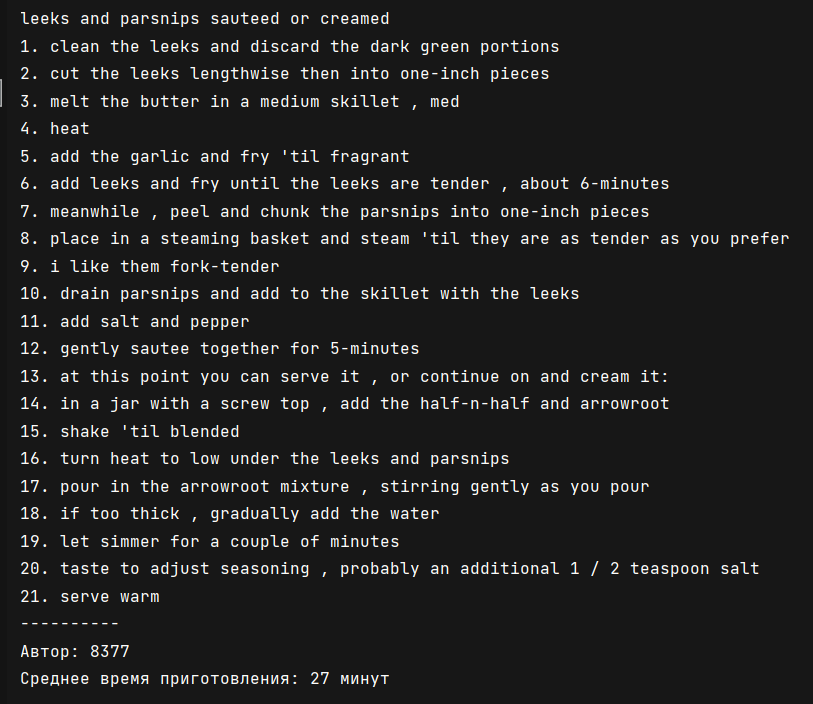

## Работа с регулярными выражениями

6\.1\.3\. Напишите регулярное выражение, которое ищет следующий паттерн в строке: число (1 цифра или более), затем пробел, затем слова: hour или hours или minute или minutes. Произведите поиск по данному регулярному выражению в каждом шаге рецепта с id 25082. Выведите на экран все непустые результаты, найденные по данному шаблону.

In [6]:
from bs4 import BeautifulSoup
import re

with open(r'C:\Users\Саня\Downloads\lr3\steps_sample.xml') as f:
    content = BeautifulSoup(f, "xml")
for rec in content.recipes.find_all("recipe"):
    if rec.id.text == '25082':
        steps = [step.next for step in rec.steps.find_all("step")]

mask = r'[0-9]+\s(hour|minute)s?' # + 1 и более; ? (0,1); \s-пробел; | - или
for step in steps:
    if re.search(mask, step) is not None:
        print(step)

turn out onto a lightly floured board and knead for about 20 minutes , adding flour as nescessary to keep the dough from sticking to the board
when it has been sufficiently kneaded , cover it with a damp cloth for about 10 minutes and wash and grease the bowl lightly
let the dough rise until it springs back when you stick your finger in it , and it is about twice the size as it was before (this takes about 2 hours
when the dough has risen twice , deflate it again and cover it with the damp cloth again for about 10 minutes , then divide it into and shape it into loaves , buns , etc
bake at 400 for 20 minutes , and then turn the oven down to 350 and bake for 20-30 minutes longer , until the loaf is a lovely brown and sounds hollow when you thump it on the bottom


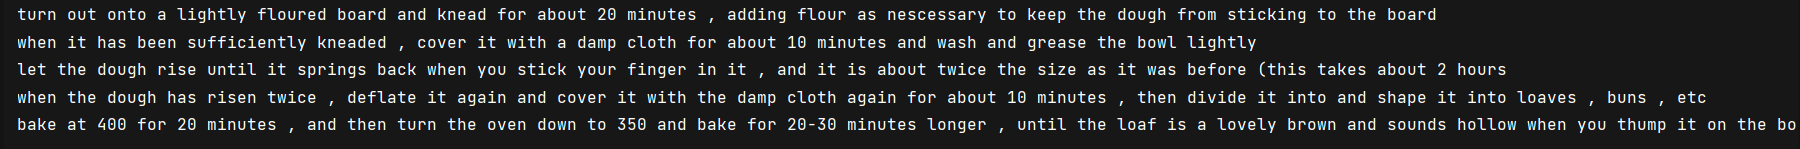

6\.1\.4\. Напишите регулярное выражение, которое ищет шаблон вида "this..., but" _в начале строки_ . Между словом "this" и частью ", but" может находиться произвольное число букв, цифр, знаков подчеркивания и пробелов. Никаких других символов вместо многоточия быть не может. Пробел между запятой и словом "but" может присутствовать или отсутствовать.

Используя строковые методы `pd.Series`, выясните, для каких рецептов данный шаблон содержится в тексте описания. Выведите на экран количество таких рецептов и 3 примера подходящих описаний (текст описания должен быть виден на экране полностью).

In [7]:
import re
description_data = pd.Series(data['description'])
satisfactory = description_data[description_data.str.match(r'this[A-Za-z0-9_ ]+, ?but')==True]
print(len(satisfactory))
print(*satisfactory.sample(3).to_numpy(), sep='\n\n')

133
this is a very simple recipe, but it's made savory by using chicken broth and adding the cashews.  it doesn't take long to make, and i've found that fresh parsley really enhances the flavor of the dish rather than dried parsley.

this is a great recipe, but it is for 500 i need to figure out how to break it down.

this is a nice simple way to prepare chicken in the crock pot, but it tastes like you put a lot of work into it!


## Лабораторная 6.2

6\.2\.1\. В текстах шагов рецептов обыкновенные дроби имеют вид "a / b". Используя регулярные выражения, уберите в тексте шагов рецепта с id 72367 пробелы до и после символа дроби. Выведите на экран шаги этого рецепта после их изменения.

In [22]:
import re
string = show_info(72367)

In [23]:
print(string)

bavarian apple cheese cake tart
1. mix butter , flour , 1 / 3 c
2. sugar and 1-1 / 4 t
3. vanilla
4. press into greased 9" springform pan
5. mix cream cheese , 1 / 4 c
6. sugar , eggs and 1 / 2 t
7. vanilla beating until fluffy
8. pour over dough
9. combine apples , 1 / 3 c
10. sugar and cinnamon
11. arrange on top of cream cheese mixture and sprinkle with almonds
12. bake at 350 for 45-55 minutes , or until tester comes out clean
----------
Автор: 93006
Среднее время приготовления: 65 минут


In [24]:
mask= r'(?<=[0-9])* / (?=[0-9])*' # ?<= Условие что в начале должны стоять цифры ?= условие, что в конце идут цифры
string = re.sub(mask, '/', string)
print(string)

<re.Match object; span=(57, 60), match=' / '>

bavarian apple cheese cake tart
1. mix butter , flour , 1/3 c
2. sugar and 1-1/4 t
3. vanilla
4. press into greased 9" springform pan
5. mix cream cheese , 1/4 c
6. sugar , eggs and 1/2 t
7. vanilla beating until fluffy
8. pour over dough
9. combine apples , 1/3 c
10. sugar and cinnamon
11. arrange on top of cream cheese mixture and sprinkle with almonds
12. bake at 350 for 45-55 minutes , or until tester comes out clean
----------
Автор: 93006
Среднее время приготовления: 65 минут


### Сегментация текста

6\.2\.2\. Разбейте тексты шагов рецептов на слова при помощи пакета `nltk`. Посчитайте и выведите на экран кол-во уникальных слов среди всех рецептов. Словом называется любая последовательность алфавитных символов (для проверки можно воспользоваться `str.isalpha`). При подсчете количества уникальных слов не учитывайте регистр.

In [2]:
import nltk
from nltk.tokenize import word_tokenize

In [56]:
text = []
for rec in content.recipes.find_all("recipe"):
    text +=[step.next.lower() for step in rec.steps.find_all("step")]

In [57]:
text = ' '.join(text)
#разбивает текст на слова
w_k = word_tokenize(text)
display(w_k)

['in',
 '1',
 '/',
 '4',
 'cup',
 'butter',
 ',',
 'saute',
 'carrots',
 ',',
 'onion',
 ',',
 'celery',
 'and',
 'broccoli',
 'stems',
 'for',
 '5',
 'minutes',
 'add',
 'thyme',
 ',',
 'oregano',
 'and',
 'basil',
 'saute',
 '5',
 'minutes',
 'more',
 'add',
 'wine',
 'and',
 'deglaze',
 'pan',
 'add',
 'hot',
 'chicken',
 'stock',
 'and',
 'reduce',
 'by',
 'one-third',
 'add',
 'worcestershire',
 'sauce',
 ',',
 'tabasco',
 ',',
 'smoked',
 'chicken',
 ',',
 'beans',
 'and',
 'broccoli',
 'florets',
 'simmer',
 '5',
 'minutes',
 'add',
 'cream',
 ',',
 'simmer',
 '5',
 'minutes',
 'more',
 'and',
 'season',
 'to',
 'taste',
 'drop',
 'in',
 'remaining',
 'butter',
 ',',
 'piece',
 'by',
 'piece',
 ',',
 'stirring',
 'until',
 'melted',
 'and',
 'serve',
 'immediately',
 'smoked',
 'chicken',
 ':',
 'on',
 'a',
 'covered',
 'grill',
 ',',
 'slightly',
 'smoke',
 'boneless',
 'chicken',
 ',',
 'cooking',
 'to',
 'medium',
 'rare',
 'chef',
 'meskan',
 'uses',
 'applewood',
 'chips',


In [58]:
from collections import Counter

sum([1 if i.isalpha() else 0 for i in Counter(w_k).keys()])

14926

6\.2\.3\. Разбейте описания рецептов из `recipes` на предложения при помощи пакета `nltk`. Найдите 5 самых длинных описаний (по количеству _предложений_) рецептов в датасете и выведите строки фрейма, соответствующие этим рецептами, в порядке убывания длины.

In [16]:
from nltk.tokenize import sent_tokenize 
data = pd.read_csv('recipes_sample.csv', index_col='id', delimiter=",", parse_dates=['submitted'])
data

,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,
44123,george s at the cove black bean soup,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
35173,italian gut busters,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
84797,love is in the air beef fondue sauces,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...
267661,zurie s holey rustic olive and cheddar bread,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
386977,zwetschgenkuchen bavarian plum cake,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
103312,zwiebelkuchen southwest german onion cake,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN


In [79]:
lst = []
for i in data.description.values:
    # разбивает текст на предложения
    lst.append(sent_tokenize(str(i)))

In [98]:
diction = dict(zip(data.index, lst))
diction

{44123: ["an original recipe created by chef scott meskan, george's at the cove.",
  'we enjoyed this when we visited this restaurant in la jolla, california.',
  'this recipe is requested so often, they have it printed and ready at the hostess stand.',
  "it's unbeatable at the restaurant, but i do a pretty good job at home, too, if i do say so myself!"],
 67664: ['my children and their friends ask for my homemade popsicles morning, noon and night.',
  'i never turn them down; who am i to tell them that they are good for them!',
  'for variety i substitute different flavours of frozen juice - grape, fruit punch, tropical etc.'],
 38798: ['these were so go, it surprised even me.'],
 35173: ['my sister-in-law made these for us at a family get together.',
  'they are delicious!!',
  'a little messy to make but worth the effort!!',
  'have a helper and make an'],
 84797: ['i think a fondue is a very romantic casual dinner or wonderful for after the theatre snack served with a robust red w

In [97]:
sorted_tuples = sorted(diction.items(), key=lambda item: len(item[1]), reverse=True)
sorted_tuples[:5]

[(334113,
  ['this wonderful icing is used for icing cakes and cookies as well as for borders and art work on cakes.',
   'it makes a delicious filling also between the layers of cakes and under fondant icing.',
   'you can make roses but it takes 3 or more days to dry them depending on the humidity.',
   'there are many versions of “buttercream” icing.',
   'some are made with eggs and all butter.',
   'some varieties, you have to cook your sugar to a softball stage.',
   'others are 100% shortening or a combination of shortening and butter.',
   'each decorator has his or her favorite.',
   'i personally think that the best taste and textured recipe is the one that has you cook your sugar, add to whipped eggs and use pounds of butter per batch.',
   'but….',
   'i live in a state that can easily be a 100 degrees for days on end during the summer and you know what butter does on hot days.',
   'it melts!',
   'a greasy puddle of melted icing on a cake plate is not something i want to 

In [96]:
data.loc[[k[0] for k in sorted_tuples[:5]]]

,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,
334113,my favorite buttercream icing for decorating,30,681465,2008-10-30,12.0,this wonderful icing is used for icing cakes a...,NaN
287008,alligator claws avocado fritters with chipot...,45,765354,2008-02-19,NaN,a translucent golden-brown crust allows the gr...,9.0
328708,rich barley mushroom soup,60,221776,2008-10-03,NaN,this is one of the best soups i've ever made a...,10.0
205348,chocolate tea,6,428824,2007-01-14,NaN,i wrote this because there are an astounding l...,NaN
316000,little bunny foo foo cake carrot cake with c...,68,689540,2008-07-27,14.0,the first time i made this cake i grated a mil...,NaN


6\.2\.4\. Напишите функцию, которая для заданного предложения выводит информацию о частях речи слов, входящих в предложение, в следующем виде:
```
PRP   VBD   DT      NNS     CC   VBD      NNS        RB   
 I  omitted the raspberries and added strawberries instead
``` 
Для определения части речи слова можно воспользоваться `nltk.pos_tag`.

Проверьте работоспособность функции на названии рецепта с id 241106.

Обратите внимание, что часть речи должна находиться ровно посередине над соотвествующим словом, а между самими словами должен быть ровно один пробел.


In [110]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Саня\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [44]:
def part_of_speech(sentence):
    import nltk
    from nltk.tokenize import word_tokenize

    #токенизируем по словам
    text = word_tokenize(sentence)
    # список из частей речи
    st = [f'{v: ^{len(k)}}' for k, v in nltk.pos_tag(text)]
    return f"{' '.join(st)}\n{' '.join(text)}"

In [45]:
sentence = data.loc[241106]['name']
sentence

'eggplant steaks with chickpeas  feta cheese and black olives'

In [46]:
print(part_of_speech(sentence))

   JJ     NNS    IN     NNS    VBP    JJ   CC   JJ    NNS  
eggplant steaks with chickpeas feta cheese and black olives
